In [2]:
#图片压缩尺寸,然后预测

In [57]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [232]:
inputFile = 'original.jpg'
outputFile = 'adjust.jpg'
image = Image.open(inputFile)
converted_image = image.convert("L")
''' 这里本来是想要用灰度，但是后来发现训练集的数据都没有考虑灰度的问题，所以这里就不搞了
threshold = 100 #二值化的灰度分界线
table = []
for i in range(256):
    if i < threshold:
        table.append(10)
    else:
        table.append(100)
'''
(x,y) = image.size
x_s = 28
y_s = 28
#out = converted_image.point(table, '1') #写入
out = converted_image.resize((x_s,y_s),Image.ANTIALIAS)
#out = out.resize((x_s,y_s),Image.ANTIALIAS)
out.save(outputFile)

print('原始: ',x,y)
print('调整后: ',x_s,y_s)

原始:  169 162
调整后:  28 28


In [233]:
data = out.getdata()
data = np.array(data)
data.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          3,   4,   4,   4,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,
         51,  95, 103, 100,  38,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [180]:
X = data.reshape(28,28)

In [83]:
X.shape

(28, 28)

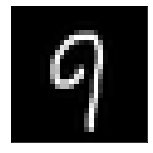

In [244]:
fig, ax = plt.subplots(1,1,figsize=(10,2.5),subplot_kw={"xticks":[],"yticks":[]})
ax.imshow(data.reshape(28,28),cmap="binary_r")

In [234]:
#这一段的想法是用已经训练好的pca和rfc对新数据操作
pca1 = joblib.load("pca1.pkl")
X_dr = pca1.transform([data]) #这里不需要用到fit
print(X_dr)
rfc1 = joblib.load("rfc1.pkl") #使用保存的模型预测数字，如果还没有运行数字识别请先运行数字识别
prediction = rfc1.predict(X_dr)
print(prediction)

[[-217.25914875  331.54064486 -504.35013913  209.36604667   13.61715109
   -35.38776129 -520.59154801  -12.74822267 -277.71423387  241.08383203
  -262.02489615   15.70404689 -168.23512874   73.73274666   74.86590394
    21.16714606   79.82079325  132.95253198 -357.32440863 -180.05516215
    94.49899517   27.22832143   45.89335085]]
[9]


In [210]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.externals import joblib
from sklearn.decomposition import PCA
import pandas as pd